<a href="https://colab.research.google.com/github/plaban1981/DL_guided_Project/blob/main/Image_Classification_using_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import data from google drive

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## import libraries

In [ ]:
%%capture
!pip install ipyplot

In [ ]:
import pandas as pd # Data analysis and manipultion tool
import numpy as np # Fundamental package for linear algebra and multidimensional arrays
import tensorflow as tf # Deep Learning Tool
import os # OS module in Python provides a way of using operating system dependent functionality
import cv2 # Library for image processing
from sklearn.model_selection import train_test_split # For splitting the data into train and validation set
from sklearn.metrics import f1_score, accuracy_score
import cv2
import ipyplot
from PIL  import Image
import seaborn as sns
import matplotlib.pyplot as plt


        WARNING! Google Colab Environment detected!
        You might encounter issues while running in Google Colab environment.
        If images are not displaying properly please try setting `base_64` param to `True`.
        


## create pandas data frame to assimilate the data and label name into a dataframe

In [ ]:
train_labels = []
val_labels = []
train_image = []
val_image = []

In [ ]:
import os
from tqdm import tqdm
train_path = "/content/drive/MyDrive/DL_guided/Image_Classification/train"
val_path = "/content/drive/MyDrive/DL_guided/Image_Classification/val"

for folder in tqdm(os.listdir(train_path)):
  for img in os.listdir(os.path.join(train_path,folder)):
    train_labels.append(folder)
    train_image.append(img)


100%|██████████| 104/104 [00:00<00:00, 598.14it/s]


In [ ]:
len(train_labels),len(train_image)

(12753, 12753)

In [ ]:
for folder in tqdm(os.listdir(val_path)):
  for img in os.listdir(os.path.join(val_path,folder)):
    val_labels.append(folder)
    val_image.append(img)

100%|██████████| 104/104 [00:00<00:00, 1197.99it/s]


In [ ]:
len(val_labels),len(val_image)

(3712, 3712)

## Create Train and validation data frame

In [ ]:
train = pd.DataFrame({'Filename':train_image,'Label':train_labels})
val = pd.DataFrame({'Filename':val_image,'Label':val_labels})

In [ ]:
from sklearn.utils import shuffle
train = shuffle(train)
val = shuffle(val)

In [ ]:
train.head()

Filename            Label
3753    8124.jpeg            daisy
920    12303.jpeg  blackberry lily
11000   3011.jpeg    wild geranium
8505    6501.jpeg             rose
10720  10026.jpeg    wild geranium

In [ ]:
val.head()

Filename             Label
275   14797.jpeg    blanket flower
3046  13344.jpeg        water lily
2748  14688.jpeg         sunflower
245   14133.jpeg  black-eyed susan
3632  15608.jpeg        windflower

## Create Test Dataframe

In [64]:
test_imgs  = [ img for img in os.listdir("/content/drive/MyDrive/DL_guided/Image_Classification/test/")]

In [68]:
test = pd.DataFrame({'Filename':test_imgs})
test.head()

Filename
0  001e13533.jpeg
1  0021f0d33.jpeg
2  003882deb.jpeg
3  0039e54f0.jpeg
4  003b89961.jpeg

## Visualize Training images randomly

In [ ]:
train_formated = train.copy()
train_formated['Filename'] = "/content/drive/MyDrive/DL_guided/Image_Classification/train/" + train['Label'] + "/"+ train['Filename']
train_formated.head()

Filename            Label
3753   /content/drive/MyDrive/DL_guided/Image_Classif...            daisy
920    /content/drive/MyDrive/DL_guided/Image_Classif...  blackberry lily
11000  /content/drive/MyDrive/DL_guided/Image_Classif...    wild geranium
8505   /content/drive/MyDrive/DL_guided/Image_Classif...             rose
10720  /content/drive/MyDrive/DL_guided/Image_Classif...    wild geranium

In [42]:
val_formated = val.copy()
val_formated['Filename'] = "/content/drive/MyDrive/DL_guided/Image_Classification/val/" + val['Label'] + "/"+ val['Filename']
val_formated.head()

Filename             Label
275   /content/drive/MyDrive/DL_guided/Image_Classif...    blanket flower
3046  /content/drive/MyDrive/DL_guided/Image_Classif...        water lily
2748  /content/drive/MyDrive/DL_guided/Image_Classif...         sunflower
245   /content/drive/MyDrive/DL_guided/Image_Classif...  black-eyed susan
3632  /content/drive/MyDrive/DL_guided/Image_Classif...        windflower

In [43]:
image_samples = train_formated['Filename'].values.tolist()
image_labels = train_formated['Label'].values.tolist()


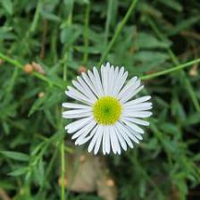
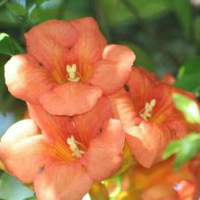
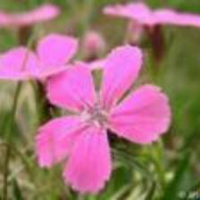
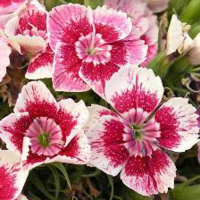
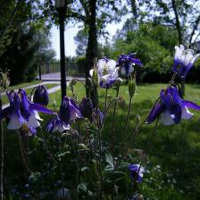
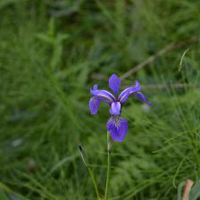
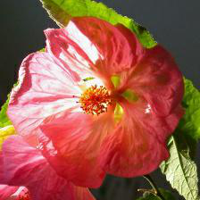
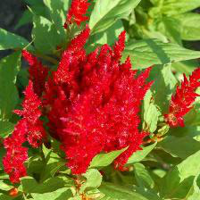
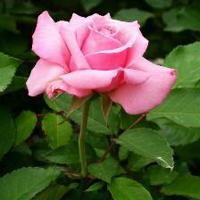
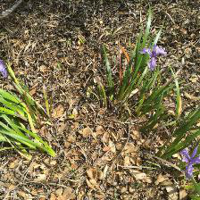
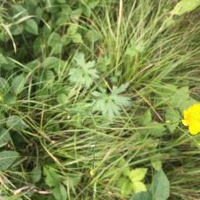
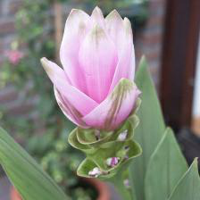
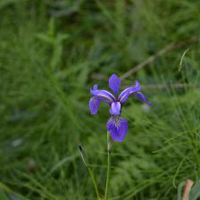
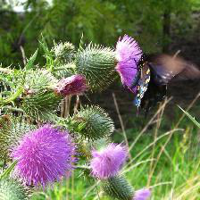
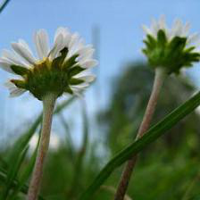
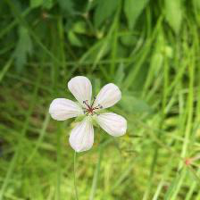
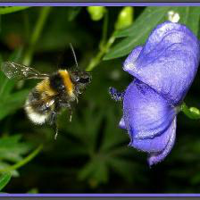
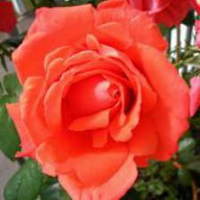
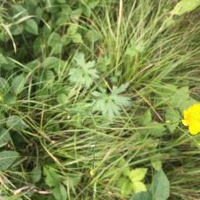
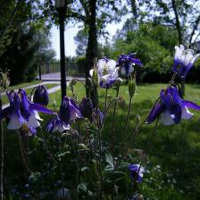
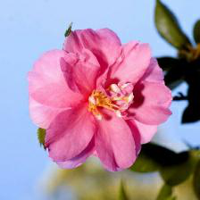


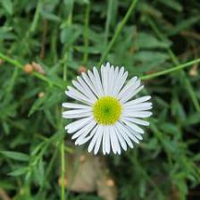
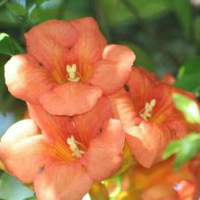
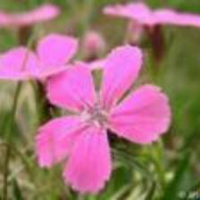
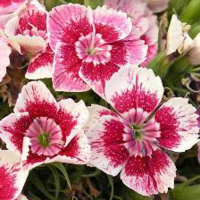
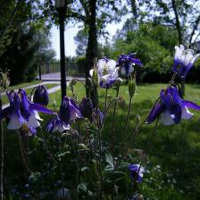
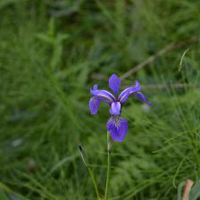
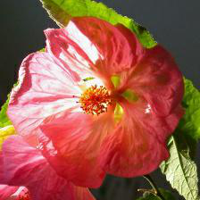
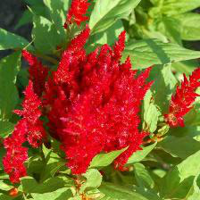
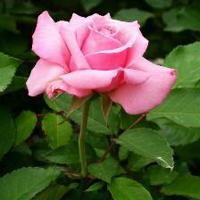
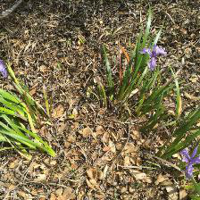
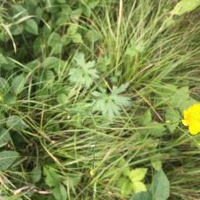
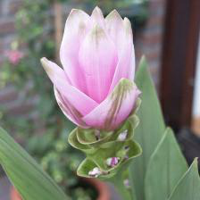
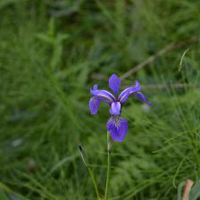
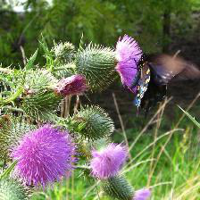
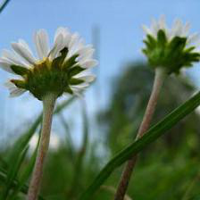
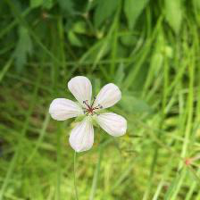
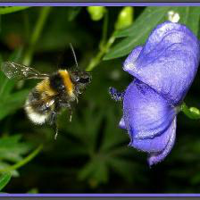
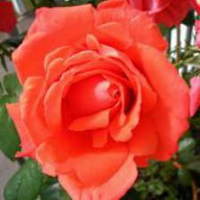
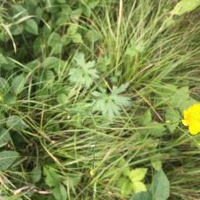
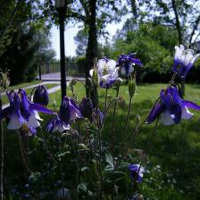
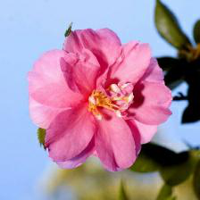

In [ ]:
import random
image_array = []
image_label_array = []
for i in range(21):
  index = random.randint(1,100)
  img = Image.open(image_samples[index])
  image_array.append(img)
  image_label_array.append(image_labels[index])


ipyplot.plot_images(image_array,image_label_array,img_width=200)

## Visualize validation Images


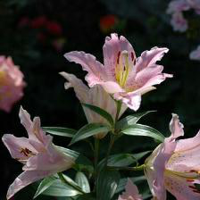
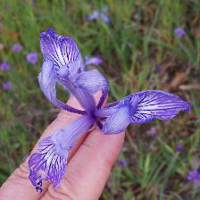
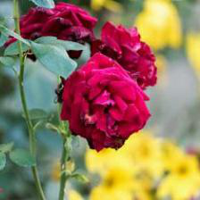
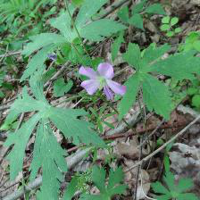
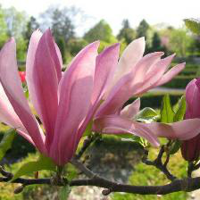
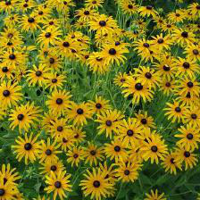
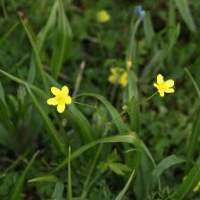
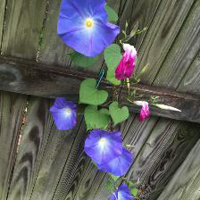
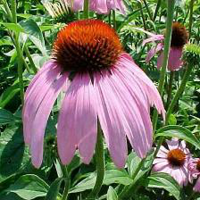
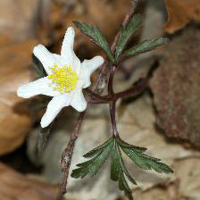
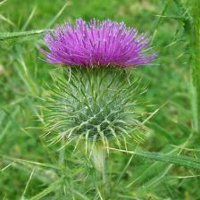
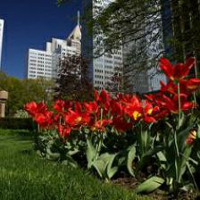
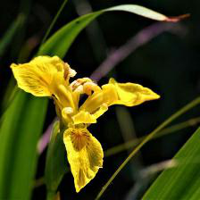
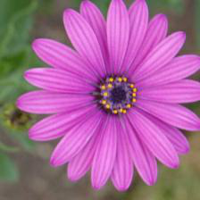
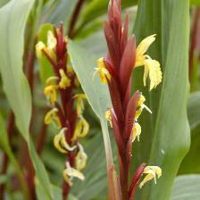
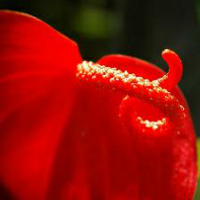
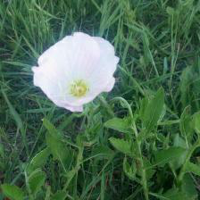
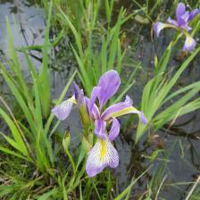
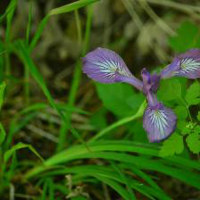
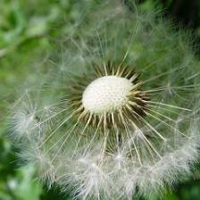
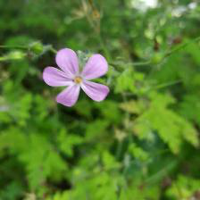


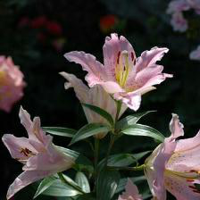
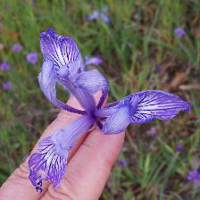
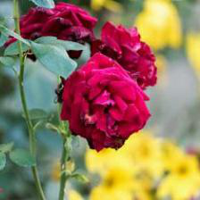
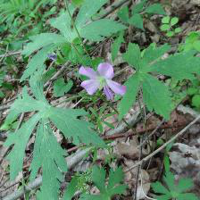
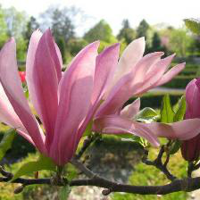
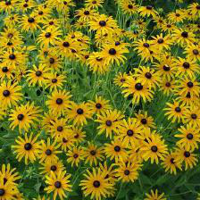
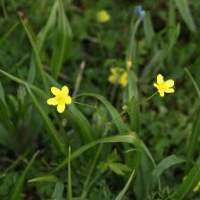
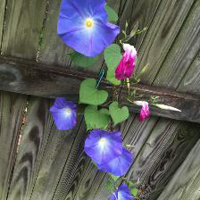
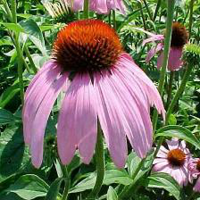
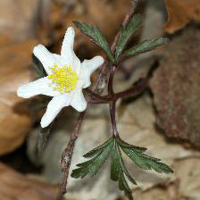
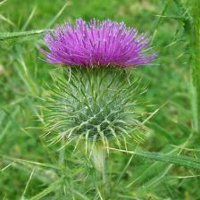
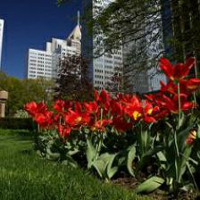
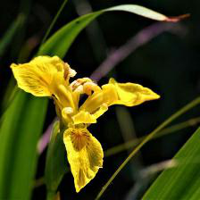
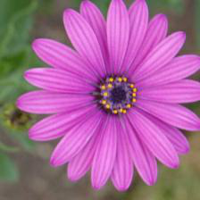
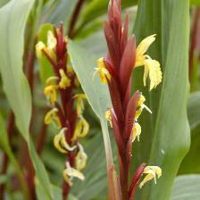
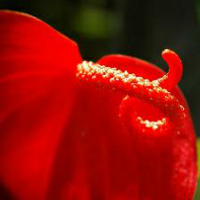
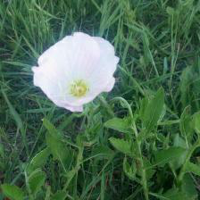
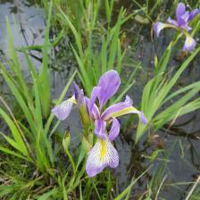
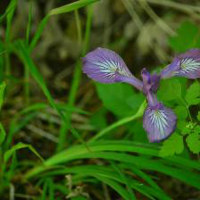
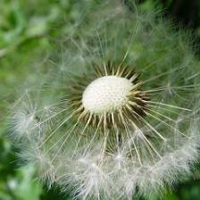
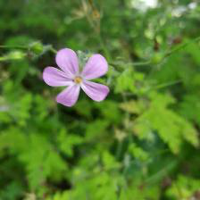

In [44]:
image_samples = val_formated['Filename'].values.tolist()
image_labels = val_formated['Label'].values.tolist()
#

image_array = []
image_label_array = []
for i in range(21):
  index = random.randint(1,100)
  img = Image.open(image_samples[index])
  image_array.append(img)
  image_label_array.append(image_labels[index])


ipyplot.plot_images(image_array,image_label_array,img_width=200)

## Build Montage of training images using opencv

In [ ]:
import cv2
from imutils import build_montages
from google.colab.patches import cv2_imshow
# initialize the list of images
images = []
# loop over the list of image paths
for imagePath in image_samples:
	# load the image and update the list of images
	image = cv2.imread(imagePath)
	images.append(image)
# construct the montages for the images
montages = build_montages(images, (224, 224), (7, 3))
for montage in montages:
	cv2_imshow( montage)


## merge val and train into a single dataframe

In [77]:
df = pd.concat([train_formated,val_formated],axis=0)

In [79]:
df = shuffle(df)

In [80]:
df.head()

Filename             Label
2336   /content/drive/MyDrive/DL_guided/Image_Classif...  common dandelion
579    /content/drive/MyDrive/DL_guided/Image_Classif...          bee balm
4073   /content/drive/MyDrive/DL_guided/Image_Classif...        frangipani
3892   /content/drive/MyDrive/DL_guided/Image_Classif...          foxglove
11341  /content/drive/MyDrive/DL_guided/Image_Classif...     wild geranium

In [47]:
df.shape

(16465, 2)

In [48]:
df.to_csv('/content/drive/MyDrive/DL_guided/Image_Classification/training_dat.csv',index=False)

## Visualize the labels

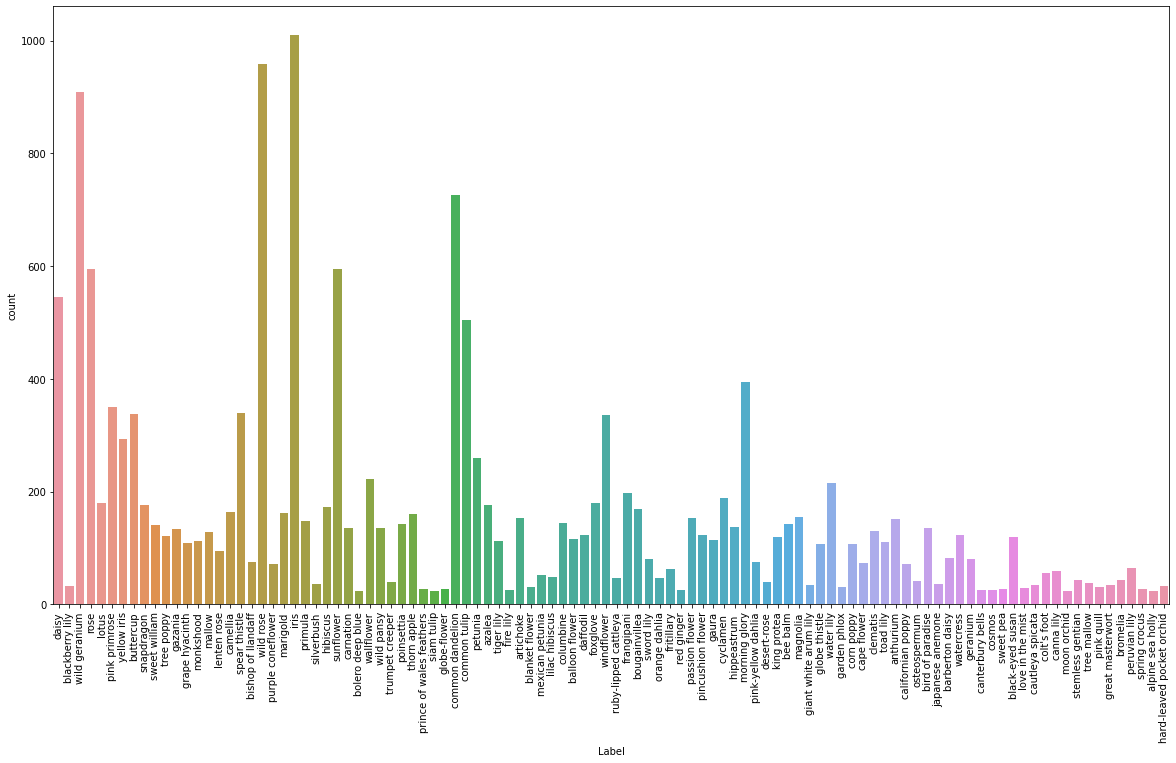

In [53]:
plt.figure(figsize=(20,11))
plt.xticks(rotation=90)
sns.countplot(x='Label',data=df)
plt.show()

##Total number of Labels

In [54]:
df.Label.nunique()

104

## Transfer Learning for Image Classification using keras

In [55]:
from sklearn.model_selection import KFold, StratifiedKFold
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.layers import Dense, Dropout,  Conv2D, Input, Lambda, Flatten, TimeDistributed, Activation, MaxPool2D
from tensorflow.keras.layers import Add, Reshape, MaxPooling2D, Concatenate, Embedding, RepeatVector, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.regularizers import *
#
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns
sns.set_style('darkgrid')
#
import os
import shutil
import cv2
import glob
from tqdm.notebook import tqdm
from tqdm import tqdm
from PIL import Image
#
import gc
#
import warnings
warnings.filterwarnings('ignore')

##ImageDataGenerator

In [56]:
batch_size=32
image_shape=(229,229,3)
class_mode='categorical'

## Train / Validation Image data generator

In [57]:
generator = ImageDataGenerator(rescale=1/255.)

## Test data Generator

In [70]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_generator=test_datagen.flow_from_dataframe(
dataframe=test,
directory="//content/drive/MyDrive/DL_guided/Image_Classification/test",
x_col="Filename",
y_col=None,
batch_size=1,
seed=42,
shuffle=False,
class_mode=None,
target_size=(229,229))
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

Found 7382 validated image filenames.


## Define a function for getting model name in each of the k iterations

In [71]:
def get_model_name(k):
    return 'model_'+str(k)+'.h5'

## Define a function to claibrate F1 Scores

In [72]:
import keras.backend as K
def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

## Create Base Model

In [82]:
def create_model():
  model = Sequential()

  conv_base = tf.keras.applications.DenseNet121(input_shape=(229,229,3), include_top=False, pooling='max',weights='imagenet')
  model.add(conv_base)
  model.add(BatchNormalization())
  model.add(Dense(2048, activation='relu', kernel_regularizer=l1_l2(0.01)))
  model.add(BatchNormalization())
  model.add(Dense(df.Label.nunique(), activation='softmax'))

  train_layers = [layer for layer in conv_base.layers[::-1][:5]]

  for layer in conv_base.layers:
    if layer in train_layers:
      layer.trainable = True
  return model

In [83]:
create_model().summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 1024)              7037504   
_________________________________________________________________
batch_normalization_2 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_2 (Dense)              (None, 2048)              2099200   
_________________________________________________________________
batch_normalization_3 (Batch (None, 2048)              8192      
_________________________________________________________________
dense_3 (Dense)              (None, 104)               213096    
Total params: 9,362,088
Trainable params: 9,272,296
Non-trainable params: 89,792
_________________________________________________________________


## Model Traing Evaluation and Predictions

* Train the Model using StartifiedKFold Crossvalidation technique
* Getting the folds and creating the data generators
* Training the model on each Fold and evaluating on the validation fold
* Making the predictions on the test data badsed on the training for the fold
* Saving the predictions for each fold in a list
* Taking the average of all the five predictions made on the basis of each fold for the final predictions

Found 13172 validated image filenames belonging to 104 classes.
Found 3293 validated image filenames belonging to 104 classes.
Epoch 1/10
411/411 [==============================] - 130s 244ms/step - loss: 42.0673 - accuracy: 0.2861 - get_f1: 0.2291 - val_loss: 36.6444 - val_accuracy: 0.1072 - val_get_f1: 5.0276e-04

Epoch 00001: val_loss improved from inf to 36.64437, saving model to /content/drive/MyDrive/DL_guided/Image_Classification/saved_model/model_1.h5
Epoch 2/10
411/411 [==============================] - 97s 236ms/step - loss: 15.7379 - accuracy: 0.4388 - get_f1: 0.3514 - val_loss: 110.0860 - val_accuracy: 0.2181 - val_get_f1: 0.0000e+00

Epoch 00002: val_loss did not improve from 36.64437
Epoch 3/10
411/411 [==============================] - 97s 236ms/step - loss: 13.5756 - accuracy: 0.3954 - get_f1: 0.2725 - val_loss: 14.3638 - val_accuracy: 0.1798 - val_get_f1: 0.0029

Epoch 00003: val_loss improved from 36.64437 to 14.36384, saving model to /content/drive/MyDrive/DL_guided/

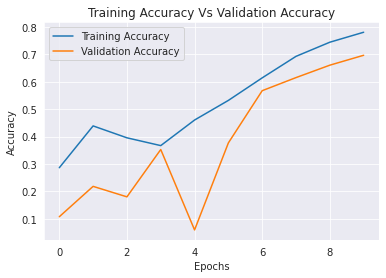

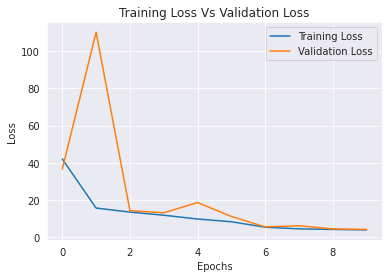

7382/7382 [==============================] - 183s 24ms/step
Found 13172 validated image filenames belonging to 104 classes.
Found 3293 validated image filenames belonging to 104 classes.
Epoch 1/10
411/411 [==============================] - 109s 238ms/step - loss: 42.1539 - accuracy: 0.2446 - get_f1: 0.1755 - val_loss: 73.9482 - val_accuracy: 0.0224 - val_get_f1: 0.0024

Epoch 00001: val_loss improved from inf to 73.94818, saving model to /content/drive/MyDrive/DL_guided/Image_Classification/saved_model/model_2.h5
Epoch 2/10
411/411 [==============================] - 96s 233ms/step - loss: 16.5153 - accuracy: 0.3725 - get_f1: 0.2593 - val_loss: 15.9998 - val_accuracy: 0.2788 - val_get_f1: 0.0000e+00

Epoch 00002: val_loss improved from 73.94818 to 15.99977, saving model to /content/drive/MyDrive/DL_guided/Image_Classification/saved_model/model_2.h5
Epoch 3/10
411/411 [==============================] - 96s 233ms/step - loss: 14.3611 - accuracy: 0.4938 - get_f1: 0.3673 - val_loss: 7201.5

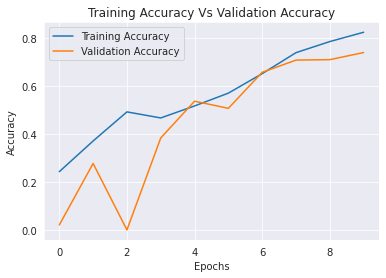

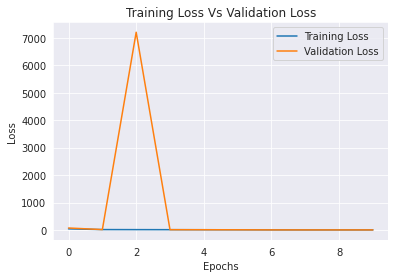

7382/7382 [==============================] - 187s 25ms/step
Found 13172 validated image filenames belonging to 104 classes.
Found 3293 validated image filenames belonging to 104 classes.
Epoch 1/10
411/411 [==============================] - 112s 242ms/step - loss: 42.2201 - accuracy: 0.2611 - get_f1: 0.2163 - val_loss: 36.0979 - val_accuracy: 0.0276 - val_get_f1: 0.0063

Epoch 00001: val_loss improved from inf to 36.09791, saving model to /content/drive/MyDrive/DL_guided/Image_Classification/saved_model/model_3.h5
Epoch 2/10
411/411 [==============================] - 97s 236ms/step - loss: 15.8738 - accuracy: 0.2920 - get_f1: 0.2002 - val_loss: 44.1920 - val_accuracy: 0.1127 - val_get_f1: 0.0220

Epoch 00002: val_loss did not improve from 36.09791
Epoch 3/10
411/411 [==============================] - 97s 236ms/step - loss: 12.3874 - accuracy: 0.3826 - get_f1: 0.2426 - val_loss: 11.6516 - val_accuracy: 0.4268 - val_get_f1: 0.0322

Epoch 00003: val_loss improved from 36.09791 to 11.65158

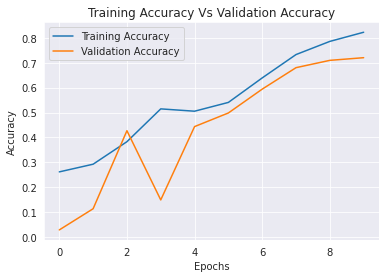

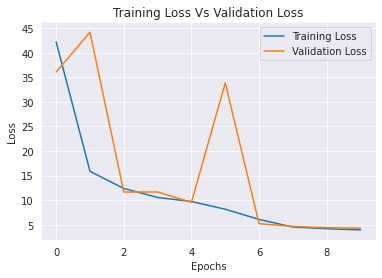

7382/7382 [==============================] - 191s 26ms/step
Found 13172 validated image filenames belonging to 104 classes.
Found 3293 validated image filenames belonging to 104 classes.
Epoch 1/10
411/411 [==============================] - 111s 241ms/step - loss: 42.0405 - accuracy: 0.2907 - get_f1: 0.2412 - val_loss: 19.3800 - val_accuracy: 0.1314 - val_get_f1: 0.0257

Epoch 00001: val_loss improved from inf to 19.38004, saving model to /content/drive/MyDrive/DL_guided/Image_Classification/saved_model/model_4.h5
Epoch 2/10
411/411 [==============================] - 97s 236ms/step - loss: 15.5965 - accuracy: 0.3890 - get_f1: 0.3000 - val_loss: 65364.7812 - val_accuracy: 0.0070 - val_get_f1: 0.0070

Epoch 00002: val_loss did not improve from 19.38004
Epoch 3/10
411/411 [==============================] - 97s 236ms/step - loss: 13.2021 - accuracy: 0.4451 - get_f1: 0.3068 - val_loss: 17.3183 - val_accuracy: 0.4249 - val_get_f1: 5.9418e-04

Epoch 00003: val_loss improved from 19.38004 to 1

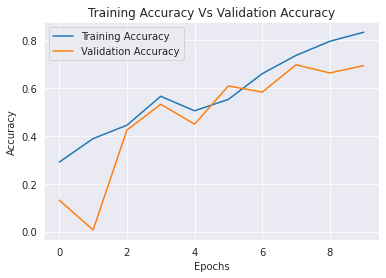

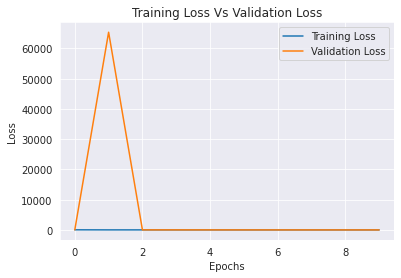

7382/7382 [==============================] - 188s 25ms/step
Found 13172 validated image filenames belonging to 104 classes.
Found 3293 validated image filenames belonging to 104 classes.
Epoch 1/10
411/411 [==============================] - 110s 240ms/step - loss: 42.0916 - accuracy: 0.3001 - get_f1: 0.2552 - val_loss: 149.2857 - val_accuracy: 0.0876 - val_get_f1: 0.0158

Epoch 00001: val_loss improved from inf to 149.28574, saving model to /content/drive/MyDrive/DL_guided/Image_Classification/saved_model/model_5.h5
Epoch 2/10
411/411 [==============================] - 96s 234ms/step - loss: 15.8822 - accuracy: 0.3639 - get_f1: 0.2674 - val_loss: 370.0466 - val_accuracy: 0.2442 - val_get_f1: 0.0102

Epoch 00002: val_loss did not improve from 149.28574
Epoch 3/10
411/411 [==============================] - 97s 235ms/step - loss: 12.5996 - accuracy: 0.4470 - get_f1: 0.3183 - val_loss: 12.8466 - val_accuracy: 0.3361 - val_get_f1: 0.0076

Epoch 00003: val_loss improved from 149.28574 to 12.

In [ ]:
from keras.models import load_model
VALIDATION_ACCURACY = []
VALIDAITON_LOSS = []
all_preds = []
dropout=.3
lr=.001
num_epochs = 15
save_dir = '/content/drive/MyDrive/DL_guided/Image_Classification/saved_model/'
fold_var = 1
#n_class = 2
skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)
#
for train_index, val_index in skf.split(df,df.Label):
	training_data = df.iloc[train_index]
	validation_data = df.iloc[val_index]
	
	train_data_generator = generator.flow_from_dataframe(training_data, 
			 	 	 	                                          x_col = "Filename", 
                                                      y_col = "Label",
						                                          class_mode = class_mode, 
                                                      batch_size = 32,
                                                      seed = 42,
                                                      shuffle = True,
                                                      target_size=(229,229))
	valid_data_generator  = generator.flow_from_dataframe(validation_data, 
							                                          x_col = "Filename", 
                                                        y_col = "Label",
						                                            class_mode = class_mode, 
                                                        batch_size = 32,
                                                        seed = 42,
                                                        shuffle = True,
                                                        target_size=(229,229))
	
	# CREATE NEW MODEL
	model = create_model()
	# COMPILE NEW MODEL
	model.compile(optimizer =tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                  metrics=["accuracy",get_f1],
                  loss= tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1))
	# CREATE CALLBACKS
	
	my_callbacks = [
               tf.keras.callbacks.ModelCheckpoint(save_dir+get_model_name(fold_var), monitor = 'val_loss',verbose = 1,save_weights_only=False, save_best_only = True),
              EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='min'),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='min',min_delta=1e-4)
	]

	# There can be other callbacks, but just showing one because it involves the model name
	# This saves the best model
	# FIT THE MODEL
	STEP_SIZE_TRAIN = train_data_generator.n//train_data_generator.batch_size
	STEP_SIZE_VALID = valid_data_generator.n//valid_data_generator.batch_size
	history = model.fit(
        train_data_generator,
        steps_per_epoch= STEP_SIZE_TRAIN,
        epochs=10,
        validation_data=valid_data_generator,
        validation_steps= STEP_SIZE_VALID,
        callbacks=[my_callbacks], 
        )
	#PLOT HISTORY
	#		:
	plt.plot(history.history['accuracy'],label='Training Accuracy')
	plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
	plt.xlabel('Epochs')
	plt.ylabel('Accuracy')
	plt.title('Training Accuracy Vs Validation Accuracy')
	plt.legend()
	plt.show()
  #
	plt.plot(history.history['loss'],label='Training Loss')
	plt.plot(history.history['val_loss'],label='Validation Loss')
	plt.xlabel('Epochs')
	plt.ylabel('Loss')
	plt.title('Training Loss Vs Validation Loss')
	plt.legend()
	plt.show()
	#		:
	
	# LOAD BEST MODEL to evaluate the performance of the model
	model.load_weights("/content/drive/MyDrive/DL_guided/Image_Classification/saved_model/model_"+str(fold_var)+".h5")
	results = model.evaluate(valid_data_generator)
	results = dict(zip(model.metrics_names,results))
	
	VALIDATION_ACCURACY.append(results['accuracy'])
	VALIDAITON_LOSS.append(results['loss'])
	preds = model.predict(test_generator,steps=STEP_SIZE_TEST,verbose=1)
	all_preds.append(preds)
	#
	tf.keras.backend.clear_session()
	gc.collect()
	fold_var += 1

## Predictions

In [86]:
all_preds = []
for fold_var in range(1,6):
  # LOAD BEST MODEL to evaluate the performance of the model
	model.load_weights("/content/drive/MyDrive/DL_guided/Image_Classification/saved_model/model_"+str(fold_var)+".h5")
	preds = model.predict(test_generator,steps=STEP_SIZE_TEST,verbose=1)
	all_preds.append(preds)

7382/7382 [==============================] - 187s 25ms/step


##Final Predictions

In [87]:
final_pred = (all_preds[0] + all_preds[1] + all_preds[2] + all_preds[3] + all_preds[4])/5
predictions = np.argmax(final_pred,axis=1)

In [99]:
labels_mapper = {v:k for k,v in train_data_generator.class_indices.items()}
labels_mapper

{0: 'alpine sea holly',
 1: 'anthurium',
 2: 'artichoke',
 3: 'azalea',
 4: 'balloon flower',
 5: 'barberton daisy',
 6: 'bee balm',
 7: 'bird of paradise',
 8: 'bishop of llandaff',
 9: 'black-eyed susan',
 10: 'blackberry lily',
 11: 'blanket flower',
 12: 'bolero deep blue',
 13: 'bougainvillea',
 14: 'bromelia',
 15: 'buttercup',
 16: 'californian poppy',
 17: 'camellia',
 18: 'canna lily',
 19: 'canterbury bells',
 20: 'cape flower',
 21: 'carnation',
 22: 'cautleya spicata',
 23: 'clematis',
 24: "colt's foot",
 25: 'columbine',
 26: 'common dandelion',
 27: 'common tulip',
 28: 'corn poppy',
 29: 'cosmos',
 30: 'cyclamen ',
 31: 'daffodil',
 32: 'daisy',
 33: 'desert-rose',
 34: 'fire lily',
 35: 'foxglove',
 36: 'frangipani',
 37: 'fritillary',
 38: 'garden phlox',
 39: 'gaura',
 40: 'gazania',
 41: 'geranium',
 42: 'giant white arum lily',
 43: 'globe thistle',
 44: 'globe-flower',
 45: 'grape hyacinth',
 46: 'great masterwort',
 47: 'hard-leaved pocket orchid',
 48: 'hibiscus

In [100]:
labels = [labels_mapper[i] for i in predictions]

In [102]:
test['Label'] = labels
test.head()

Filename             Label
0  001e13533.jpeg           primula
1  0021f0d33.jpeg         sunflower
2  003882deb.jpeg     globe thistle
3  0039e54f0.jpeg        poinsettia
4  003b89961.jpeg  common dandelion

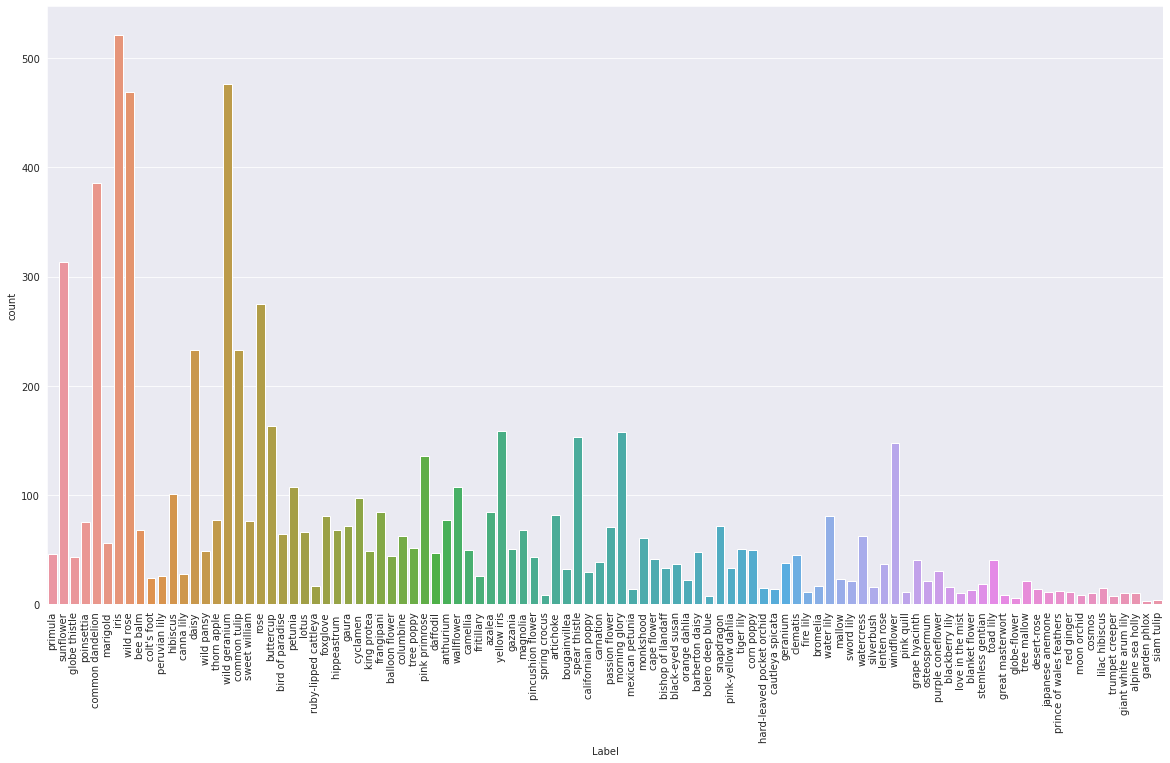

In [104]:
plt.figure(figsize=(20,11))
plt.xticks(rotation=90)
sns.countplot(x='Label',data=test)